In [ ]:
#Dieser Code berechnet den SPEI

In [2]:
#Bibliotheken
import numpy as np
import xarray as xr
import math
import time
from Formeln import durschn
import matplotlib.pyplot as plt

In [3]:
#Masken für die Korrektur der Längengradsverengung
Ma=xr.open_dataset('/Users/weber-j/Documents/Masken/GHA_klein.nc')
liste=['Burundi','Dschibuti','Eritrea','Äthiopien','Kenia','Ruanda','Somalia','Tansania','Südsudan','Sudan','Uganda','Indischer Ozean']

In [4]:
#Benötigte Datensets
gdf=xr.open_dataset('/Users/weber-j/Documents/tp_all.nc')
gd=xr.open_dataset('/Users/weber-j/Documents/t2m_all.nc')
gd=gd.isel(longitude=slice(0,88),time=slice(365,15000))
gdf=gdf.isel(longitude=slice(0,88),time=slice(687,15000))

In [106]:
np.min(gd.t2m)

<xarray.DataArray 't2m' ()>
array(280.32858, dtype=float32)

In [127]:
g=xr.open_dataset('/Users/weber-j/Documents/Mean_tp.nc')

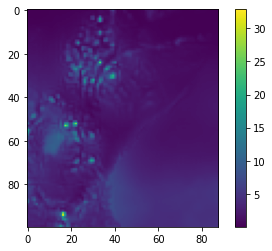

In [128]:
#Test
plt.imshow(np.asarray(g.tp))
plt.colorbar()

In [126]:
np.max(g.ws10[35:50,20:40])

<xarray.DataArray 'ws10' ()>
array(6.4752202)

In [8]:
#Berechnung der Durchschnittstemperatur jeden Monats seit 1980 pro Land
gd=xr.open_dataset('/Users/weber-j/Documents/t2m_all.nc')
gd=gd.isel(longitude=slice(0,88),time=slice(365,14610))
motag=[31,28,31,30,31,30,31,31,30,31,30,31]
li2=[31,29,31,30,31,30,31,31,30,31,30,31]
lis2=[]
lis0=[]
start=time.time()
for ma in range (0,12): #(0,12)
    gdd=gd.t2m*Ma.Masken[ma]
    lis1=[]
    for Jahr in range (0,39):
        lis=[]
        for Monat in range (0,12):
            sch=int((Jahr)/4)+1
            if Jahr == 0 or Jahr == 4 or Jahr == 8 or Jahr == 12 or Jahr == 16 or Jahr == 20 or Jahr == 24 or Jahr == 28 or 
            Jahr == 32 or Jahr == 36:
                if Monat < 2:
                    anf=Jahr*365+np.sum(li2[slice(0,Monat+1)])-li2[Monat]+sch-1
                    ende=anf+li2[Monat]-1
                else:
                    anf=Jahr*365+np.sum(li2[slice(0,Monat+1)])-li2[Monat]+sch-1
                    ende=anf+li2[Monat]-1
            else:
                anf=Jahr*365+np.sum(motag[slice(0,Monat+1)])-motag[Monat]+sch
                ende=anf+li[Monat]-1
            if Jahr == 0 or Jahr == 4 or Jahr == 8 or Jahr == 12 or Jahr == 16 or Jahr == 20 or Jahr == 24 or Jahr == 28 or 
            Jahr == 32 or Jahr == 36:
                for j in range (0,li2[Monat]):
                    gd1=gdd.isel(time=anf+j)
                    gd2=float(np.sum(gd1)/np.count_nonzero(gd1))
                    lis0.append(float(gd2))
            else:
                for j in range (0,motag[Monat]):
                    gd1=gdd.isel(time=anf+j)
                    gd2=float(np.sum(gd1)/np.count_nonzero(gd1))
                    lis0.append(float(gd2))
            lis.append(np.mean(lis0)-273.15)
            lis0=[]
        lis1.append(lis)
    end=time.time()
    print(liste[ma],'   Zeit:',end-start)
    lis2.append(lis1)

Burundi    Zeit: 13.038738012313843
Dschibuti    Zeit: 25.655930995941162
Eritrea    Zeit: 38.68424201011658
Äthiopien    Zeit: 50.54354810714722
Kenia    Zeit: 62.41647005081177
Ruanda    Zeit: 74.41284728050232
Somalia    Zeit: 86.43375492095947
Tansania    Zeit: 97.89305400848389
Südsudan    Zeit: 108.77010893821716
Sudan    Zeit: 120.41642498970032
Uganda    Zeit: 131.95930290222168
Indischer Ozean    Zeit: 143.702082157135


In [7]:
#Monatlicher Niederschlag seit 1980 pro Land
li=[31,28,31,30,31,30,31,31,30,31,30,31]
li2=[31,29,31,30,31,30,31,31,30,31,30,31]
las2=[]
las0=[]
start=time.time()
for ma in range (0,12): #(0,12)
    gdd=gdf.tp*Ma.Masken[ma]
    gdd1=gd.t2m[0]*Ma.Masken[ma]
    las1=[]
    for Jahr in range (0,39):
        las=[]
        for Monat in range (0,12):
            sch=int((Jahr)/4)+1
            if Jahr == 0 or Jahr == 4 or Jahr == 8 or Jahr == 12 or Jahr == 16 or Jahr == 20 or Jahr == 24 or Jahr == 28 or
            Jahr == 32 or Jahr == 36:
                if Monat < 2:
                    anf=Jahr*365+np.sum(li2[slice(0,Monat+1)])-li2[Monat]+sch-1
                    ende=anf+li2[Monat]-1
                else:
                    anf=Jahr*365+np.sum(li2[slice(0,Monat+1)])-li2[Monat]+sch-1
                    ende=anf+li2[Monat]-1
            else:
                anf=Jahr*365+np.sum(li[slice(0,Monat+1)])-li[Monat]+sch
                ende=anf+li[Monat]-1
            if Jahr == 0 or Jahr == 4 or Jahr == 8 or Jahr == 12 or Jahr == 16 or Jahr == 20 or Jahr == 24 or Jahr == 28 or
            Jahr == 32 or Jahr == 36:
                for j in range (0,li2[Monat]):
                    gd1=gdd.isel(time=anf+j)
                    gd2=float(np.sum(gd1)/np.count_nonzero(gdd1))
                    las0.append(float(gd2))
            else:
                for j in range (0,li[Monat]):
                    gd1=gdd.isel(time=anf+j)
                    gd2=float(np.sum(gd1)/np.count_nonzero(gdd1))
                    las0.append(float(gd2))
            las.append(np.mean(las0))
            las0=[]
        las1.append(las)
    end=time.time()
    print(liste[ma],'   Zeit:',end-start)
    las2.append(las1)

Burundi    Zeit: 12.579519987106323
Dschibuti    Zeit: 23.143727779388428
Eritrea    Zeit: 32.739413022994995
Äthiopien    Zeit: 44.22598600387573
Kenia    Zeit: 56.46429371833801
Ruanda    Zeit: 68.71800684928894
Somalia    Zeit: 80.80721688270569
Tansania    Zeit: 92.2617027759552
Südsudan    Zeit: 104.08466100692749
Sudan    Zeit: 116.0524468421936
Uganda    Zeit: 128.1282458305359
Indischer Ozean    Zeit: 140.0286147594452


In [7]:
#Maske für die komplette Study Area erschaffen
import shapefile
r = shapefile.Reader('/Users/weber-j/Documents/Masterarbeit/GHA_Shapedateien/GHA.shp')
shapes = r.shapes()

gd=xr.open_dataset('/Users/weber-j/Documents/ws10_all.nc')
lati=[]
for r in range (0,len(gd.latitude)):
    lati.append(float(gd.latitude[r]))
Deucor=np.cos(np.deg2rad(lati))*6371*2*math.pi/(np.cos(np.deg2rad(0))*6371*2*math.pi)  #Das wird für die Breitenkorrektur gebraucht
Deucor
li=[]
lii=[]
for b in range (0,100):
    for a in range (0,88):
        li.append(Deucor[b])
    lii.append(li)
    li=[]
lii=np.asarray(lii)

In [18]:
#Jahresniederschlag
for i in range (0,39):
    print(np.sum(las2[0][i])/12*365)

1423.2455111624345
1542.2436905728143
1402.9568717883637
1377.212710906367
1401.4774371491403
1626.1072389153549
1756.619706671889
1617.9616192645444
1347.7739304579472
1494.7688094199355
1454.8554096992962
1429.5581448911867
1276.1660922284352
1204.8771522342747
1450.9126346157946
1248.5353555990748
1147.995849312745
1460.7644682260855
1246.263602641056
986.386930912791
923.1066933006177
1235.6582091167813
1195.1146611600398
855.3315632917439
1098.1827056234793
1019.452385357243
1309.97802568841
1123.719842772026
1060.97631052033
1197.6435783492855
1258.3427659399174
1466.0538646065365
1304.3859764651552
1256.744664182003
1225.5959304170667
1266.7765716513436
1149.7938301498061
1209.6792098096494
1450.145740259601


In [11]:
gd

<xarray.Dataset>
Dimensions:    (latitude: 100, longitude: 121, time: 14610)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T11:30:00 ... 2018-12-31T11:30:00
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 14.25 14.0 13.75 13.5 ... -10.0 -10.25 -10.5
Data variables:
    ws10       (time, latitude, longitude) float32 ...
Attributes:
    CDI:             Climate Data Interface version 1.9.5 (http://mpimet.mpg....
    Conventions:     CF-1.6
    history:         Thu Apr 29 08:41:42 2021: cdo mergetime /pd/home/weber-j...
    source:          ECMWF ERA5 reanalysis, stream=oper/enda/mnth/moda/edmm/e...
    institution:     Karlsruhe Institute of Technology - Institute of Meteoro...
    title:           ECMWF ERA5 daily wind speed
    references:      Copernicus Climate Change Service (C3S) (2017): ERA5: Fi...
    comment:         Computation of wind speed based on daily averages from E...
    Contact_person:  Christof Lorenz (Christof.Lorenz@kit.edu)
    Author:          Christof Lorenz (Christof.Lorenz@kit.edu)
    License:         For non-commercial use only
    CDO:             Climate Data Operators version 1.9.5 (http://mpimet.mpg....

In [13]:
#Berechnung der Breite der Länder für die Anzahl der Sonnenstunden pro Monat
lili2=[]
for ma in range (0,12):
    gdd=gd.t2m[0]*Ma.Masken[ma]
    lili1=[]
    for lat in range (0,100):
        lili1.append(np.sum(gdd[lat]))
    m = max(lili1)
    dfg=[i for i, j in enumerate(lili1) if j == m]
    lili2.append(float(gdd.latitude[dfg]))

In [14]:
lili2

[-3.0, 11.25, 13.75, 5.0, 3.5, -2.25, 9.5, -6.25, 4.75, 14.25, 2.75, 13.0]

In [14]:
#Berechnung der PET (siehe Kapitel 2.4.2)
pet=[]
for Land in range (0,12):
    print(liste[Land])
    Pet=[]
    for Jahr in range (0,39):
        i=0
        PET=[]
        for Monat in range (0,12):
            hi=(lis2[Land][Jahr][Monat]/5)**1.514
            i=i+hi
            m=6.75*10**-7*i**3-7.71*10**-5*i**2+1.79*10**-2*i+0.492
            P=np.arcsin(0.39795*np.cos(0.2163108+2*np.arctan(0.9671396*np.tan(0.00860*(15+motag[Monat]-31-186)))))
            D=24-(24/np.pi)*np.arccos((np.sin(0.8333*np.pi/180)+np.sin(lili2[Land]*np.pi/180)*np.sin(P))/(np.cos(lili2[Land]*np.pi/180)*np.cos(P)))
            if Jahr == 0 or Jahr == 4 or Jahr == 8 or Jahr == 12 or Jahr == 16 or Jahr == 20 or Jahr == 24 or Jahr == 28 or Jahr == 32 or Jahr == 36:
                K=(D/12)*(motag[Monat]/30)
            else:
                K=(D/12)*(li2[Monat]/30)
            PET.append(16*K*((10*lis2[Land][Jahr][Monat])/i)**m)
        Pet.append(np.asarray(PET))
    pet.append(np.asarray(Pet))

Burundi
Dschibuti
Eritrea
Äthiopien
Kenia
Ruanda
Somalia
Tansania
Südsudan
Sudan
Uganda
Indischer Ozean


In [22]:
las2[Land][Jahr][Monat]*31-pet[Land][Jahr][Monat]

-37.9547696156221

In [16]:
#Berechnung des SPEI pro Land
tabel=[]
for Land in range (0,12):
    tab=[]
    print(liste[Land])
    SPEI=[]
    for Jahr in range (0,39):
        a1=0
        for Monat in range (2,5):
            a1=(las2[Land][Jahr][Monat]*motag[Monat]-pet[Land][Jahr][Monat])+a1
        SPEI.append(a1)
    mean=np.mean(SPEI)
    std=np.std(SPEI)
    for Jahr in range (0,39):
        print((SPEI[Jahr]-mean)/std)
        tab.append((SPEI[Jahr]-mean)/std)
    tabel.append(tab)

Burundi
0.6406440558060851
2.537637824795872
0.4520813389262526
0.1629833466859826
-0.7005967571548676
1.916378171331475
1.7566958026834956
1.6263526278139397
-0.06386498981902358
0.5197985736134374
1.0159377156463278
1.068149739318614
-0.18609348696043926
-0.016595014120248133
0.2284348284282446
0.3861315025040664
-0.7789732975598505
0.8843722699127188
0.012042678790710346
-0.7070299934089437
-1.6864151872744941
-1.266359961737683
0.08734191906968122
-1.5184964206633071
-1.0934809604923688
-0.35293447439942505
0.3886142442733025
-1.6112676315279975
-1.0097223710450687
-0.5880622765865483
-0.8339621045313005
-0.39577079867013243
0.08806134251494012
-0.07432837260395067
-1.1292028762072015
-0.4860584409429944
-0.6506047415946379
-0.179407975314993
1.5575701505003285
Dschibuti
-0.9606892482997119
1.7124948044103796
2.0506302136630326
1.4877895893454232
0.18461588636163423
1.3468149818097364
1.2500632063716233
1.2807034473463053
-0.9129261025837024
3.1404021727603237
-0.4858731410247531
-

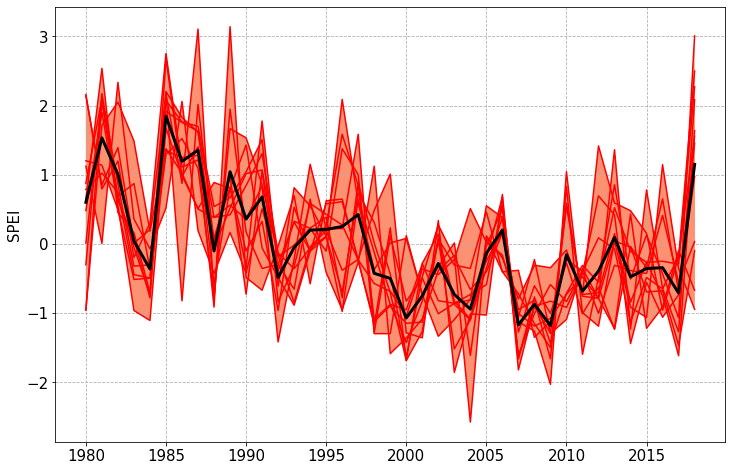

In [17]:
#SPEI der Länder plotten
fig=plt.figure(figsize=(12,8))
Mittl=[]
for Jahr in range (0,39):
    Mit=[]
    for Land in range (0,12):
        Mit.append(tabel[Land][Jahr])
    Mittl.append(np.mean(Mit))
for i in range (0,12):
    plt.plot(tabel[i],color='red')
plt.plot(Mittl,color='k',linewidth=3)
plt.xticks(size=15,ticks=np.arange(0,39,5),labels=np.arange(1980,2018,5))
plt.yticks(size=15)
plt.ylabel('SPEI',size=15)
plt.grid(linestyle='--')
plt.fill_between(np.arange(0,39,1),tabel[0],tabel[1],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,39,1),tabel[2],tabel[3],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,39,1),tabel[4],tabel[5],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,39,1),tabel[6],tabel[7],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,39,1),tabel[8],tabel[9],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,39,1),tabel[10],tabel[11],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,39,1),tabel[7],tabel[8],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,39,1),tabel[9],tabel[10],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,39,1),tabel[1],tabel[2],facecolor='#fc9272', alpha=1)

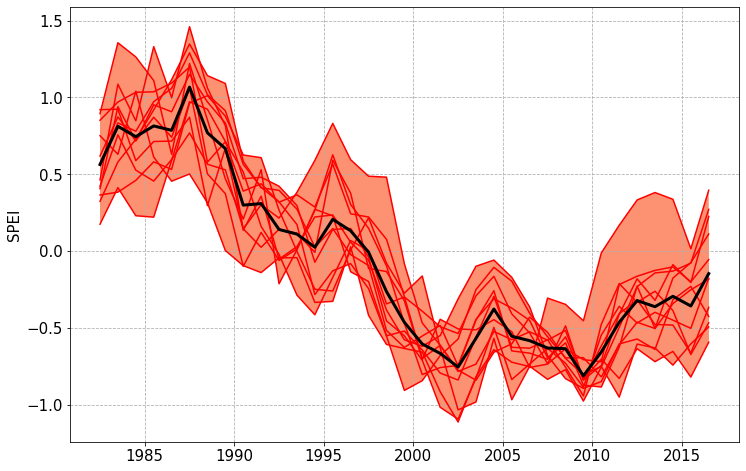

In [25]:
#SPEI mit five-year moving window, Fig. 4
Tab=[]
for Land in range (0,12):
    table=[]
    for yr in range (0,35):
        table.append(np.mean(tabel[Land][yr:yr+5]))
    Tab.append(table)

Mittl=[]
for Jahr in range (0,35):
    Mit=[]
    for Land in range (0,12):
        Mit.append(Tab[Land][Jahr])
    Mittl.append(np.mean(Mit))
    
fig=plt.figure(figsize=(12,8))
for i in range (0,12):
    plt.plot(Tab[i],color='red')
plt.plot(Mittl,color='k',linewidth=3)
plt.xticks(size=15,ticks=np.arange(-2.5,37.5,5),labels=np.arange(1980,2020,5))
plt.yticks(size=15)
plt.grid(linestyle='--')
plt.ylabel('SPEI',size=15)
plt.fill_between(np.arange(0,35,1),Tab[0],Tab[1],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,35,1),Tab[2],Tab[3],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,35,1),Tab[4],Tab[5],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,35,1),Tab[6],Tab[7],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,35,1),Tab[8],Tab[9],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,35,1),Tab[10],Tab[11],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,35,1),Tab[7],Tab[8],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,35,1),Tab[9],Tab[10],facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,35,1),Tab[1],Tab[2],facecolor='#fc9272', alpha=1)

In [97]:
Mittl

[0.5628157226958582,
 0.8116941929017137,
 0.7439625780691236,
 0.8140644962309982,
 0.7856420308432361,
 1.0669001106788614,
 0.7697518014682264,
 0.6670002954632047,
 0.2986838140510289,
 0.3085584779091782,
 0.14002346523087286,
 0.10991814030613728,
 0.024155364332691647,
 0.20598029345339544,
 0.1317769046218203,
 -0.007851557650358637,
 -0.2639904590929855,
 -0.4644986195970118,
 -0.6057978587065036,
 -0.6671089743331585,
 -0.7559528617713215,
 -0.56832690350707,
 -0.3778179843203535,
 -0.5551726140753834,
 -0.5841431096074441,
 -0.6317148205011759,
 -0.6360203262450187,
 -0.8127761703604209,
 -0.6575924022394206,
 -0.4637310703515261,
 -0.3228929712861863,
 -0.3627813533288868,
 -0.2947941571109159,
 -0.35784740920271635,
 -0.14670810316013208]

In [78]:
#Das Ganze nun für die gesamte Region

#Berechnung der Durchschnittstemperatur jeden Monats seit 1980
gd=xr.open_dataset('/Users/weber-j/Documents/t2m_all.nc')
gd=gd.isel(longitude=slice(0,88),time=slice(365,14610))
li=[31,28,31,30,31,30,31,31,30,31,30,31]
li2=[31,29,31,30,31,30,31,31,30,31,30,31]
lis2=[]
lis0=[]
start=time.time()

gdd=gd.t2m*lii
lis1=[]
for Jahr in range (0,39):
    lis=[]
    for Monat in range (0,12):
        sch=int((Jahr)/4)+1
        if Jahr == 0 or Jahr == 4 or Jahr == 8 or Jahr == 12 or Jahr == 16 or Jahr == 20 or Jahr == 24 or Jahr == 28 or Jahr == 32 or Jahr == 36:
            if Monat < 2:
                anf=Jahr*365+np.sum(li2[slice(0,Monat+1)])-li2[Monat]+sch-1
                ende=anf+li2[Monat]-1
            else:
                anf=Jahr*365+np.sum(li2[slice(0,Monat+1)])-li2[Monat]+sch-1
                ende=anf+li2[Monat]-1
        else:
            anf=Jahr*365+np.sum(li[slice(0,Monat+1)])-li[Monat]+sch
            ende=anf+li[Monat]-1
        if Jahr == 0 or Jahr == 4 or Jahr == 8 or Jahr == 12 or Jahr == 16 or Jahr == 20 or Jahr == 24 or Jahr == 28 or Jahr == 32 or Jahr == 36:
            for j in range (0,li2[Monat]):
                gd1=gdd.isel(time=anf+j)
                gd2=float(np.sum(gd1)/np.count_nonzero(gd1))
                lis0.append(float(gd2))
        else:
            for j in range (0,li[Monat]):
                gd1=gdd.isel(time=anf+j)
                gd2=float(np.sum(gd1)/np.count_nonzero(gd1))
                lis0.append(float(gd2))
        lis.append(np.mean(lis0)-273.15)
        lis0=[]
    lis1.append(lis)
end=time.time()
print('Zeit:',end-start)
lis2.append(lis1)

#Monatlicher Niederschlag seit 1980 pro Land
li=[31,28,31,30,31,30,31,31,30,31,30,31]
li2=[31,29,31,30,31,30,31,31,30,31,30,31]
las2=[]
las0=[]
gdd=gdf.tp*lii
gdd1=gd.t2m[0]*lii
las1=[]
for Jahr in range (0,39):
    las=[]
    for Monat in range (0,12):
        sch=int((Jahr)/4)+1
        if Jahr == 0 or Jahr == 4 or Jahr == 8 or Jahr == 12 or Jahr == 16 or Jahr == 20 or Jahr == 24 or Jahr == 28 or Jahr == 32 or Jahr == 36:
            if Monat < 2:
                anf=Jahr*365+np.sum(li2[slice(0,Monat+1)])-li2[Monat]+sch-1
                ende=anf+li2[Monat]-1
            else:
                anf=Jahr*365+np.sum(li2[slice(0,Monat+1)])-li2[Monat]+sch-1
                ende=anf+li2[Monat]-1
        else:
            anf=Jahr*365+np.sum(li[slice(0,Monat+1)])-li[Monat]+sch
            ende=anf+li[Monat]-1
        if Jahr == 0 or Jahr == 4 or Jahr == 8 or Jahr == 12 or Jahr == 16 or Jahr == 20 or Jahr == 24 or Jahr == 28 or Jahr == 32 or Jahr == 36:
            for j in range (0,li2[Monat]):
                gd1=gdd.isel(time=anf+j)
                gd2=float(np.sum(gd1)/np.count_nonzero(gdd1))
                las0.append(float(gd2))
        else:
            for j in range (0,li[Monat]):
                gd1=gdd.isel(time=anf+j)
                gd2=float(np.sum(gd1)/np.count_nonzero(gdd1))
                las0.append(float(gd2))
        las.append(np.mean(las0))
        las0=[]
    las1.append(las)
end=time.time()
print('Zeit:',end-start)
las2.append(las1)

#Berechnung der PET
pet=[]

Pet=[]
for Jahr in range (0,39):
    i=0
    PET=[]
    for Monat in range (0,12):
        hi=(lis2[0][Jahr][Monat]/5)**1.514
        i=i+hi
        m=6.75*10**-7*i**3-7.71*10**-5*i**2+1.79*10**-2*i+0.492
        P=np.arcsin(0.39795*np.cos(0.2163108+2*np.arctan(0.9671396*np.tan(0.00860*(15+li[Monat]-31-186)))))
        D=24-(24/np.pi)*np.arccos((np.sin(0.8333*np.pi/180)+np.sin(2*np.pi/180)*np.sin(P))/(np.cos(2*np.pi/180)*np.cos(P)))
        if Jahr == 0 or Jahr == 4 or Jahr == 8 or Jahr == 12 or Jahr == 16 or Jahr == 20 or Jahr == 24 or Jahr == 28 or Jahr == 32 or Jahr == 36:
            K=(D/12)*(li[Monat]/30)
        else:
            K=(D/12)*(li2[Monat]/30)
        PET.append(16*K*((10*lis2[0][Jahr][Monat])/i)**m)
    Pet.append(np.asarray(PET))
pet.append(np.asarray(Pet))

#Berechnung des SPEI

for Jahr in range (0,39):
    a1=0
    for Monat in range (0,12):
        a1=(las2[0][Jahr][Monat]*31-pet[0][Jahr][Monat])+a1
    print(a1)

KeyboardInterrupt: 

In [57]:
for Jahr in range (0,39):
    a1=0
    for Monat in range (4,5):
        a1=(las2[0][Jahr][Monat]*31-pet[0][Jahr][Monat])+a1
    print(a1)

28.02263347578031
-19.34381734050615
34.39023709621409
-15.450350848770839
-35.83924597921951
-3.599545556486561
-11.825996053987382
36.904168773886866
-51.974325883595895
-15.762049561093605
-52.64031388362011
10.596679014396528
-42.711159244181516
-15.920517558581821
-6.779546057285884
-31.115587338141637
-17.643887738776087
-49.04864224618531
-17.72299485128633
-55.33359553278946
-41.115442619840636
-51.05707794484016
-70.13214200223655
-42.83760914708992
-81.51685899721662
-0.10028889405465691
-28.10765715755872
-35.762496497527934
-48.05762599280172
-49.156598111903335
-23.65517358015569
-29.24689363317475
-7.213783520653749
-45.16070094500043
-18.287886750754865
-13.083248203735053
-39.92136076473119
-19.762606900425965
0.08352444623960764


In [68]:
pet[0][38]

array([130.27030266, 118.18368816, 123.82557192, 116.7628249 ,
       117.4909804 , 106.32423166, 102.73847097, 100.21145907,
       100.13841614, 102.25370947,  98.86574482,  94.98597999])